In [2]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
warnings.filterwarnings('ignore')
plt.figure(facecolor="white")

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

# Grades Sheet

## Data Importing, Cleaning, and Preparation

In [4]:
df = pd.read_csv("Student Marks.csv")
df= df.fillna(0.0)
df = df.astype(int)
df = df.set_index("seat",drop=True)
df = df.drop(["Unnamed: 0"],axis=1)
df

,math1,physics1,statics,history,rights,drawing1,production,math2,physics2,drawing2,dynamics,chemistry,topics
seat,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,63,53,38,32,32,64,81,64,64,64,43,51,48
3,45,61,49,38,42,61,98,49,71,68,42,73,58
4,46,59,36,38,40,69,75,47,29,65,25,75,73
5,70,76,56,44,43,85,97,84,85,79,61,77,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,0,0,0,0,0,0,0,0,0,0,0,0,0
1041,30,23,10,27,41,50,20,0,0,3,0,0,0
1042,0,0,0,0,0,0,0,0,0,0,0,0,0


## Adding `Total` column

In [5]:
df['Total'] =df.sum(axis = 1)
df['Percentage'] = df['Total'] / 1150 * 100

## Top Grades, rank column

In [6]:
df.sort_values("Percentage",inplace=True,ascending=False)
df["rank"]=range(1,1045)
df

,math1,physics1,statics,history,rights,drawing1,production,math2,physics2,drawing2,dynamics,chemistry,topics,Total,Percentage,rank
seat,,,,,,,,,,,,,,,,
552,87,93,70,41,46,91,119,98,94,88,73,87,71,1058,92.000000,1
940,94,96,70,41,46,93,114,85,98,90,64,93,69,1053,91.565217,2
108,91,95,72,48,46,88,110,94,94,89,68,87,71,1053,91.565217,3
200,98,98,70,43,46,95,105,90,96,81,74,84,72,1052,91.478261,4
648,92,99,69,49,41,90,108,90,98,88,68,86,71,1049,91.217391,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,1040
521,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,1041
513,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,1042


# Sections Sheet

In [7]:
sections = pd.read_csv("Sections.csv").set_index("seat")
sections

,section
seat,
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
...,...
1042,36.0
1043,36.0
1044,36.0


**the column `name` will not be included for the sake of privacy**

## Manual Cleaning

In [8]:
sections["section"][464]=17
sections["section"][203]=7
sections["section"]=sections["section"].astype("int")

## Adding `Group` column

In [9]:
sections['group'] = pd.cut(sections["section"], bins = [0,12,24,37], labels = ['1','2','3'])

## Merging the two DataFrames

In [10]:
df = pd.merge(sections,df,right_index=True, left_index=True)
df.sort_values("Percentage",inplace=True,ascending=False)
df

,section,group,math1,physics1,statics,history,rights,drawing1,production,math2,physics2,drawing2,dynamics,chemistry,topics,Total,Percentage,rank
seat,,,,,,,,,,,,,,,,,,
552,20,2,87,93,70,41,46,91,119,98,94,88,73,87,71,1058,92.000000,1
940,33,3,94,96,70,41,46,93,114,85,98,90,64,93,69,1053,91.565217,2
108,4,1,91,95,72,48,46,88,110,94,94,89,68,87,71,1053,91.565217,3
200,7,1,98,98,70,43,46,95,105,90,96,81,74,84,72,1052,91.478261,4
648,23,2,92,99,69,49,41,90,108,90,98,88,68,86,71,1049,91.217391,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,19,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,1040
521,19,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,1041
513,18,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,1042


## Creating Hirarchy

In [11]:
df.reset_index().sort_values('seat').set_index(["group",'section','seat']).head(20)

math1  physics1  statics  history  rights  drawing1  \
group section seat                                                        
1     1       1         0         0        0        0       0         0   
              2        63        53       38       32      32        64   
              3        45        61       49       38      42        61   
              4        46        59       36       38      40        69   
              5        70        76       56       44      43        85   
              6        70        78       52       38      41        89   
              7        47        56       34       30      41        75   
              8        34        64       30       32      31        70   
              9        75         0       50       33      25         0   
              10       73        61       53       42      46        70   
              11       84        91       60       39      38        67   
              12       53        61       30       25      42        76   
              13       86        82       57       45      44        92   
              14       77        92       49       39      45        88   
              15       69        71       39       33      41        70   
              16       50        69       37       34      46        70   
              17       75        93       57       47      43        78   
              18       78        84       52       32      43        77   
              19       74        92       50       37      46        82   
              20       73        77       47       29      42        79   

                    production  math2  physics2  drawing2  dynamics  \
group section seat                                                    
1     1       1              0      0         0         0         0   
              2             81     64        64        64        43   
              3             98     49        71        68        42   
              4             75     47        29        65        25   
              5             97     84        85        79        61   
              6             90     72        77        70        42   
              7             65     41        22        49        32   
              8             68     54        41        64        34   
              9              0      0         0         0         0   
              10            89     67        92        65        59   
              11            86     80        88        68        59   
              12            72     56        36        66        30   
              13           103     82        88        80        51   
              14           111     72        91        77        38   
              15            66     48        60        73        42   
              16            66     44        32        60        34   
              17           105     79        91        87        53   
              18            76     61        62        79        45   
              19           102     64        74        68        44   
              20            68     67        62        61        40   

                    chemistry  topics  Total  Percentage  rank  
group section seat                                              
1     1       1             0       0      0    0.000000  1044  
              2            51      48    697   60.608696   647  
              3            73      58    755   65.652174   558  
              4            75      73    677   58.869565   675  
              5            77      56    913   79.391304   188  
              6            80      67    866   75.304348   322  
              7            57      40    589   51.217391   768  
              8            54      46    622   54.086957   739  
              9             0      48    231   20.086957   869  
              10           79      75    871   75.739130   305  
              11          

# Creating a DataFrame for grades per course

# Statistics

### mean and meadian

In [12]:
df["Percentage"].mean()

56.95410628019326

In [13]:
df["Percentage"].median()

67.91304347826087

## Is the data normally distributed ?

Text(0, 0.5, 'Count')

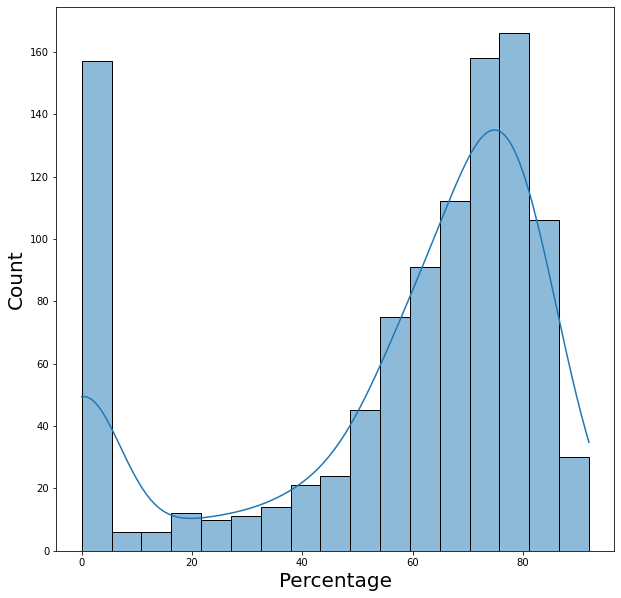

In [14]:

plt.figure(figsize=[10,10],facecolor="white")
sns.histplot(df["Percentage"],kde=True)
plt.xlabel("Percentage",fontsize=20)
plt.ylabel("Count",fontsize=20)

Apparently data has `outliers` around 0 for those who skipped some/all of the courses and still exists in the dataset
Also data is `left-skewed` and `normally-distributed`.

# Courses Statistics

In [15]:
subjects = dict(zip(df.columns[2:15], [100,100,75,50,50,100,125,100,100,100,75,100,75]))
grades = pd.DataFrame()
print(subjects)
for sub in subjects:
    sub_percentage = df[sub]/subjects[sub] * 100
    grades[sub] = pd.cut(sub_percentage, bins = [0,60,70,80,90,101], labels = ['f','d','c','b','a'], right = False, include_lowest = True)
grades

{'math1': 100, 'physics1': 100, 'statics': 75, 'history': 50, 'rights': 50, 'drawing1': 100, 'production': 125, 'math2': 100, 'physics2': 100, 'drawing2': 100, 'dynamics': 75, 'chemistry': 100, 'topics': 75}


,math1,physics1,statics,history,rights,drawing1,production,math2,physics2,drawing2,dynamics,chemistry,topics
seat,,,,,,,,,,,,,
552,b,a,a,b,a,a,a,a,a,b,a,b,a
940,a,a,a,b,a,a,a,b,a,a,b,a,a
108,a,a,a,a,a,b,b,a,a,b,a,b,a
200,a,a,a,b,a,a,b,a,a,b,a,b,a
648,a,a,a,a,b,a,b,a,a,b,a,b,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,f,f,f,f,f,f,f,f,f,f,f,f,f
521,f,f,f,f,f,f,f,f,f,f,f,f,f
513,f,f,f,f,f,f,f,f,f,f,f,f,f


In [16]:
unpivoted = pd.melt(grades)
display(unpivoted)
unpivoted['0']=0
unpivoted = unpivoted.groupby(['variable','value']).count().reset_index()
display(unpivoted)

,variable,value
0,math1,b
1,math1,a
2,math1,a
3,math1,a
4,math1,a
...,...,...
13567,topics,f
13568,topics,f
13569,topics,f
13570,topics,f


,variable,value,0
0,chemistry,a,40
1,chemistry,b,207
2,chemistry,c,277
3,chemistry,d,163
4,chemistry,f,357
...,...,...,...
60,topics,a,185
61,topics,b,242
62,topics,c,261
63,topics,d,137


# Data Visualisition

## Course Stats

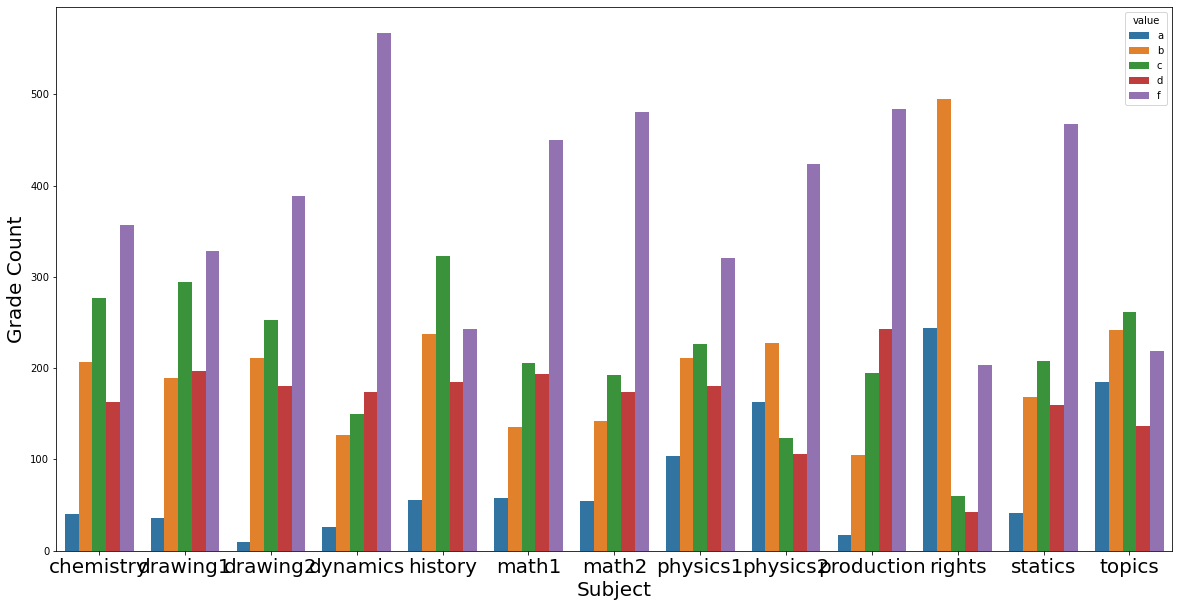

In [24]:
plt.figure(figsize=[20,10],facecolor="white")
sns.barplot(data=unpivoted, y='0', hue="value",x="variable")
plt.xlabel("Subject",fontsize=20)
plt.ylabel("Grade Count",fontsize=20)
plt.rc("xtick",labelsize=20)

## Top Sections

,Percentage
section,
12,64.022544
16,64.003478
35,63.918654
19,63.238381
9,62.757246
5,62.404682
1,61.943144
34,61.886057
15,61.670807


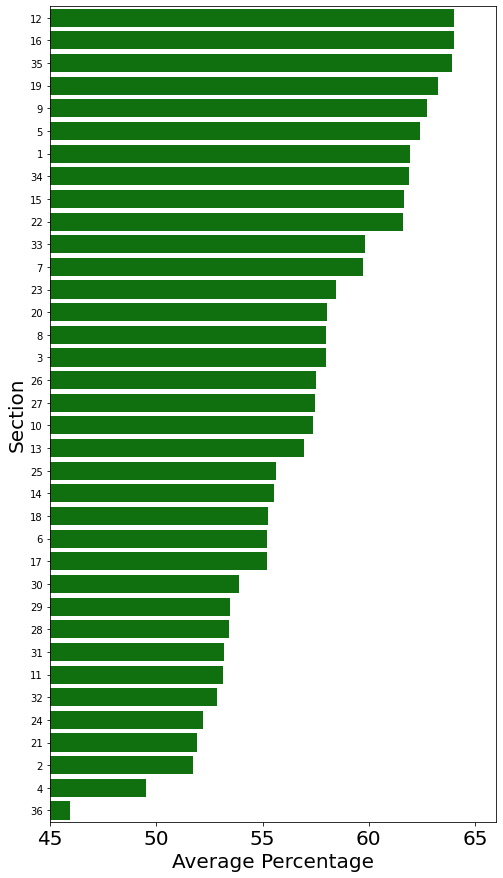

In [18]:
sections = df.groupby("section").mean().sort_values("Percentage",ascending=False)[["Percentage"]].head(36)
plt.figure(figsize=[8,15],facecolor="white")
sns.barplot(y=sections.index.astype(str),x=sections["Percentage"], color = 'g');
plt.xlim(45,66)
plt.xlabel("Average Percentage",fontsize=20)
plt.ylabel("Section",fontsize=20)
sections

## Top Group per course

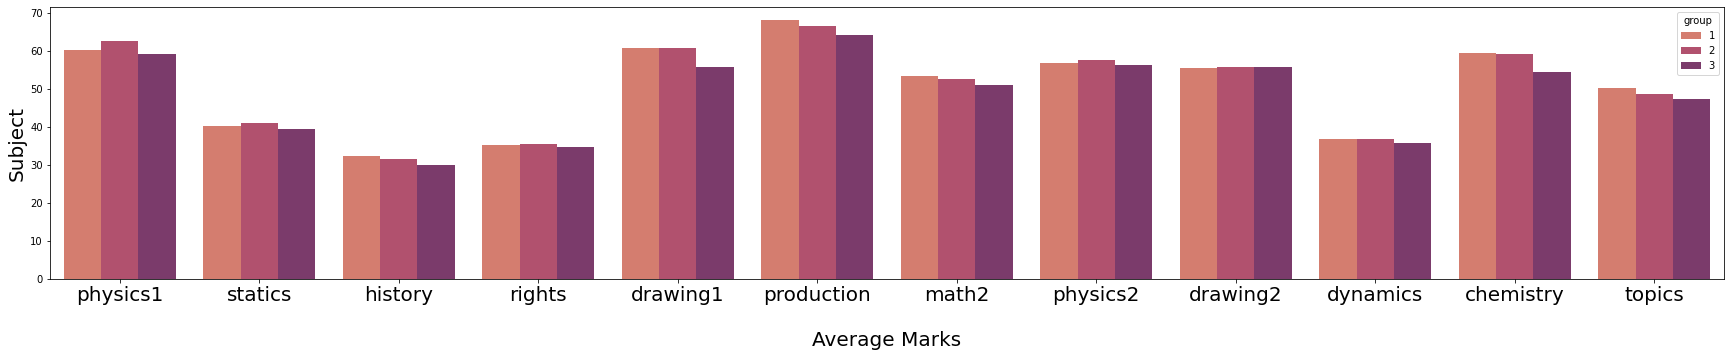

In [23]:
groups = df.groupby(["group"]).mean().iloc[:,2:14].reset_index()
groups = pd.melt(groups,id_vars=["group"])
plt.figure(figsize=[30,5],facecolor="white")
sns.barplot(palette="flare",data=groups, x="variable",y="value",hue="group")
plt.ylabel("Subject",fontsize=20)
plt.xlabel("\nAverage Marks",fontsize=20)
plt.rc("xtick",labelsize=20)

# Exporting The Final Data Set

In [ ]:
#render
df.to_csv("mataria_named.csv", encoding='utf-8')

done.